In [224]:
import pandas as pd 
import numpy as np
import pandas as pd
import folium
import geopandas as gpd
from shapely.wkt import loads

In [225]:
import geopandas as gpd

dfb = gpd.read_file(r"C:\Users\krish\Downloads\inclusivemind\telengana_booth_clustring\andhrapradesh\andhrapradesh.booth.shp")


In [226]:
l = list(range(1, 120))
print(dfb.columns)
dfb=dfb[dfb['ac'].isin(l)]
dfb['state']="Telengana"
print(dfb['ac_name'].unique())



Index(['state', 'district', 'district_n', 'pc', 'pc_name', 'ac', 'ac_name',
       'booth', 'booth_name', 'geometry'],
      dtype='object')
['Palakurthi' 'Dornakal' 'Mahabubabad' 'Narsampet' 'Parkal'
 'Warangal West' 'Warangal East' 'Wardhanapet' 'Bhupalpalle' 'Mulug'
 'Mudhole' 'Pinapaka' 'Yellandu' 'Khammam' 'Palair' 'Madhira' 'Wyra'
 'Sathupalli' 'Kothagudem' 'Aswaraopeta' 'Bhadrachalam' 'Armur' 'Bodhan'
 'Jukkal' 'Banswada' 'Yellareddy' 'Kamareddy' 'Nizamabad (Urban)'
 'Nizamabad (Rural)' 'Balkonda' 'Sirpur' 'Koratla' 'Jagtial' 'Dharmapuri'
 'Ramagundam' 'Manthani' 'Peddapalle' 'Karimnagar' 'Choppadandi'
 'Vemulawada' 'Sircilla' 'Chennur' 'Manakondur' 'Huzurabad' 'Husnabad'
 'Siddipet' 'Medak' 'Narayankhed' 'Andole' 'Narsapur' 'Zahirabad'
 'Sangareddy' 'Bellampalli' 'Patancheru' 'Dubbak' 'Gajwel' 'Medchal'
 'Malkajgiri' 'Quthbullapur' 'Kukatpally' 'Uppal' 'Ibrahimpatnam'
 'Lal Bahadur Nagar' 'Mancherial' 'Maheshwaram' 'Rajendranagar'
 'Serilingampally' 'Chevella' 'PARGI' 'Vikaraba

In [227]:
dfb=dfb[dfb['ac']==61]
dfb

,state,district,district_n,pc,pc_name,ac,ac_name,booth,booth_name,geometry
55817,Telengana,6,Hyderabad,8,Secunderabad,61,Jubilee Hills,13,"New Govt High School,class No 5",POINT (78.43422 17.45524)
55818,Telengana,6,Hyderabad,8,Secunderabad,61,Jubilee Hills,15,Rocks Town School,POINT (78.43422 17.45524)
55819,Telengana,6,Hyderabad,8,Secunderabad,61,Jubilee Hills,16,Balajyothi Govt Upper Primary School Room No 1,POINT (78.42317 17.44261)
55820,Telengana,6,Hyderabad,8,Secunderabad,61,Jubilee Hills,21,Anganwadi Kendriyam Hall No 2 (south Wing),POINT (78.41574 17.44697)
55821,Telengana,6,Hyderabad,8,Secunderabad,61,Jubilee Hills,22,Mary Mohanthy School,POINT (78.41069 17.44577)
...,...,...,...,...,...,...,...,...,...,...
56059,Telengana,6,Hyderabad,8,Secunderabad,61,Jubilee Hills,100,O/o Chief Engineer Training Corporate Institute,POINT (78.43043 17.44423)
56060,Telengana,6,Hyderabad,8,Secunderabad,61,Jubilee Hills,111,Shanti Vidyaniketan High School,POINT (78.42305 17.44160)
56061,Telengana,6,Hyderabad,8,Secunderabad,61,Jubilee Hills,234,Stamford High School,POINT (78.40619 17.39910)
56062,Telengana,6,Hyderabad,8,Secunderabad,61,Jubilee Hills,223,"Govt High School, Room No 1",POINT (78.39892 17.40040)


In [228]:
dfb = dfb.drop_duplicates(subset=['geometry'])
dfb.shape

(103, 10)

In [229]:
# Extract latitude and longitude from Point geometries
dfb['lat'] = dfb['geometry'].apply(lambda point: point.y)
dfb['lng'] = dfb['geometry'].apply(lambda point: point.x)

# Print the updated DataFrame
print(dfb[['lat', 'lng']])


             lat        lng
55817  17.455237  78.434224
55819  17.442606  78.423171
55820  17.446971  78.415739
55821  17.445770  78.410686
55822  17.448841  78.429671
...          ...        ...
56026  17.446478  78.424386
56031  17.452027  78.433622
56035  17.448644  78.428528
56044  17.432647  78.438924
56056  17.432219  78.422266

[103 rows x 2 columns]


C:\Users\krish\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\krish\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [280]:
dfb=pd.read_excel(r"C:\Users\krish\Downloads\inclusivemind\telengana_booth_clustring\24_lat_Long.xlsx")
df_shape=gpd.read_file(r"C:\Users\krish\Downloads\inclusivemind\telengana_booth_clustring\data_1_to_119\data_1_to_119.shp")
dfw=gpd.read_file(r"C:\Users\krish\Downloads\inclusivemind\telengana_booth_clustring\data_1_to_119\data_1_to_119.shp")
df_shape.head()
mergedf = pd.merge(dfb,df_shape,left_on='ac',right_on='ac',how = 'left')

In [281]:
mergedf.shape

(40, 17)

In [282]:
import geopandas as gpd
from shapely.geometry import Point

# Ensure 'mergedf' is a GeoDataFrame
if not isinstance(mergedf, gpd.GeoDataFrame):
    mergedf = gpd.GeoDataFrame(mergedf, geometry='geometry')

# Create Point geometries for each (Lat1, Lng1) and add to GeoDataFrame
mergedf['point_geom'] = mergedf.apply(lambda row: Point(row['lng'], row['lat']), axis=1)

# Check if each point is within the corresponding AC boundary
mergedf['status'] = mergedf.apply(lambda row: 'inside' if row['geometry'].contains(row['point_geom']) else 'outside', axis=1)

# Drop the temporary point geometry column if not needed
mergedf = mergedf.drop(columns=['point_geom'])

# Display the updated DataFrame with status
print(mergedf[['ac', 'lat', 'lng', 'status']])

mergedf.shape

    ac        lat        lng  status
0   61  17.455237  78.434224  inside
1   61  17.442541  78.422096  inside
2   61  17.446971  78.415739  inside
3   61  17.451101  78.428544  inside
4   61  17.448283  78.433484  inside
5   61  17.450890  78.432522  inside
6   61  17.439034  78.441586  inside
7   61  17.446755  78.439513  inside
8   61  17.431282  78.442070  inside
9   61  17.432035  78.429865  inside
10  61  17.433145  78.423801  inside
11  61  17.433896  78.421253  inside
12  61  17.453315  78.434401  inside
13  61  17.446478  78.424386  inside
14  61  17.445770  78.410686  inside
15  61  17.446564  78.428836  inside
16  61  17.444234  78.430432  inside
17  61  17.455424  78.431273  inside
18  61  17.438697  78.438171  inside
19  61  17.447994  78.437004  inside
20  61  17.430059  78.436132  inside
21  61  17.433671  78.434368  inside
22  61  17.434928  78.427547  inside
23  61  17.433718  78.420391  inside
24  61  17.437829  78.410035  inside
25  61  17.432972  78.399632  inside
2

(40, 18)

In [283]:
mergedf=mergedf[mergedf['status']=="inside"]
print(mergedf.shape)
#mergedf['ac'].value_counts()
#52862 -47393

(40, 18)


In [284]:
#mergedf.to_excel(r'C:\Users\krish\Downloads\inclusivemind\telengana_booth_clustring\clustring.xlsx')

In [285]:
mergedf.shape
filtered_mergedf=mergedf.copy()

In [ ]:
mergedf.columns
# Assuming you want to set 'geometry_x' as the active geometry column
mergedf = mergedf.set_geometry('geometry_y')


In [286]:
import json
from shapely.geometry import Point, shape
import folium
import pandas as pd

# Assuming mergedf is your GeoDataFrame
joint_df = mergedf.copy()  # Create a copy to add Location_Status if needed

# Loop through unique ACs
for ac in mergedf['ac'].unique():  # Changed to 'ac'
    try:
        # Filter the DataFrame for the current AC
        df = mergedf[mergedf['ac'] == ac]  # Changed to 'ac'

        # Extract the boundary for the current AC from the geometry_y column
        boundary1 = dfw[dfw['ac'] == ac]  # Ensure this references the correct column

        # Create a Folium map centered at the mean coordinates of the AC
        m = folium.Map(location=[df['lat'].mean(), df['lng'].mean()], zoom_start=14,
                       tiles='OpenStreetMap', zoom_control=False, attribution=None, min_zoom=6, max_zoom=20)

        # Convert boundary to GeoJSON format and add to the map
        boundary_json = json.loads(boundary1.to_json())
        folium.GeoJson(boundary_json).add_to(m)

        # Plot each point in the merged DataFrame
        for index, row in df.iterrows():
            # Create a marker for the point
            folium.Marker(
                location=[row['lat'], row['lng']],  # Changed to 'lat' and 'lng'
                popup=f"Lat: {row['lat']}, Lon: {row['lng']}",  # Changed to 'lat' and 'lng'
                tooltip='Point Location'
            ).add_to(m)

        # Save the map to an HTML file
        m.save(f'Telengana_ac{ac}_sample_maps.html')  # Changed to 'ac'
        print(f"Map for AC {ac} saved.")

    except Exception as e:
        print(f"Error processing AC {ac}: {e}")

# Optionally, save the joint DataFrame with any modifications
# joint_df.to_excel(r'C:\Users\krish\Downloads\mh_qc)p_value\mh_p_value_59.xlsx', index=False)


Map for AC 61 saved.


In [206]:
dfb=mergedf.copy()
dfb.shape

(75, 18)

In [207]:
dfb['ac'].value_counts()

ac
61    75
Name: count, dtype: int64

In [208]:
from sklearn.cluster import KMeans

# Iterate over each unique 'ac' (assembly constituency)
for i in unique_ac:
    # Filter dfb for the current 'ac'
    df = dfb[dfb['ac'] == i]
    
    # Select latitude and longitude columns for clustering
    features = df[['lat', 'lng']]
    print(features.shape)
    
    # Create KMeans model
    kmeans = KMeans(
        init="random",
        n_clusters=12,  # Change the number of clusters as needed
        n_init=10,
        max_iter=300,
        random_state=42
    )
    
    # Fit the model on the features (latitude and longitude)
    kmeans.fit(features)
    
    # Get the labels (cluster assignments)
    labels = kmeans.labels_
    
    # Save the labels in the original DataFrame (dfb)
    # Use .loc to ensure the correct rows for the current 'ac' are updated
    dfb.loc[dfb['ac'] == i, 'cluster'] = labels
    
    # Optional: Group by clusters to check the number of points per cluster
    _clusters = dfb[dfb['ac'] == i].groupby('cluster')['geometry_x'].count()
    print(_clusters)

# After the loop, dfb will have a new 'cluster' column with cluster labels for each 'ac'


(75, 2)
cluster
0.0      5
1.0      2
2.0      3
3.0      4
4.0      6
5.0     10
6.0      5
7.0      4
8.0      4
9.0     16
10.0     8
11.0     8
Name: geometry_x, dtype: int64


C:\Users\krish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [209]:
dfb

,state_x,district,district_n,pc_x,pc_name_x,ac,ac_name_x,booth,booth_name,geometry_x,lat,lng,state_y,pc_y,pc_name_y,ac_name_y,geometry_y,status,cluster
0,Telengana,6,Hyderabad,8,Secunderabad,61,Jubilee Hills,13,"New Govt High School,class No 5",POINT (78.43422 17.45524),17.455237,78.434224,Andhra Pradesh,8,Secunderabad,Jubilee Hills,"POLYGON ((78.43999 17.45459, 78.43999 17.45446...",inside,0.0
1,Telengana,6,Hyderabad,8,Secunderabad,61,Jubilee Hills,16,Balajyothi Govt Upper Primary School Room No 1,POINT (78.42317 17.44261),17.442606,78.423171,Andhra Pradesh,8,Secunderabad,Jubilee Hills,"POLYGON ((78.43999 17.45459, 78.43999 17.45446...",inside,9.0
2,Telengana,6,Hyderabad,8,Secunderabad,61,Jubilee Hills,21,Anganwadi Kendriyam Hall No 2 (south Wing),POINT (78.41574 17.44697),17.446971,78.415739,Andhra Pradesh,8,Secunderabad,Jubilee Hills,"POLYGON ((78.43999 17.45459, 78.43999 17.45446...",inside,7.0
3,Telengana,6,Hyderabad,8,Secunderabad,61,Jubilee Hills,22,Mary Mohanthy School,POINT (78.41069 17.44577),17.445770,78.410686,Andhra Pradesh,8,Secunderabad,Jubilee Hills,"POLYGON ((78.43999 17.45459, 78.43999 17.45446...",inside,7.0
4,Telengana,6,Hyderabad,8,Secunderabad,61,Jubilee Hills,27,"Tsr Public School,u K G Class Room",POINT (78.42967 17.44884),17.448841,78.429671,Andhra Pradesh,8,Secunderabad,Jubilee Hills,"POLYGON ((78.43999 17.45459, 78.43999 17.45446...",inside,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Telengana,6,Hyderabad,8,Secunderabad,61,Jubilee Hills,45,The Astrid Rowers Memorial High School(room No 4),POINT (78.42439 17.44648),17.446478,78.424386,Andhra Pradesh,8,Secunderabad,Jubilee Hills,"POLYGON ((78.43999 17.45459, 78.43999 17.45446...",inside,9.0
99,Telengana,6,Hyderabad,8,Secunderabad,61,Jubilee Hills,68,"Don Bosco High School, New Building",POINT (78.43362 17.45203),17.452027,78.433622,Andhra Pradesh,8,Secunderabad,Jubilee Hills,"POLYGON ((78.43999 17.45459, 78.43999 17.45446...",inside,11.0
100,Telengana,6,Hyderabad,8,Secunderabad,61,Jubilee Hills,77,M C H Community Hall,POINT (78.42853 17.44864),17.448644,78.428528,Andhra Pradesh,8,Secunderabad,Jubilee Hills,"POLYGON ((78.43999 17.45459, 78.43999 17.45446...",inside,5.0
101,Telengana,6,Hyderabad,8,Secunderabad,61,Jubilee Hills,173,"Mgm High Scool, L K G Room",POINT (78.43892 17.43265),17.432647,78.438924,Andhra Pradesh,8,Secunderabad,Jubilee Hills,"POLYGON ((78.43999 17.45459, 78.43999 17.45446...",inside,8.0


In [210]:
df_final=dfb.copy()

In [211]:
dfb.isna().sum()

state_x       0
district      0
district_n    0
pc_x          0
pc_name_x     0
ac            0
ac_name_x     0
booth         0
booth_name    0
geometry_x    0
lat           0
lng           0
state_y       0
pc_y          0
pc_name_y     0
ac_name_y     0
geometry_y    0
status        0
cluster       0
dtype: int64

In [212]:
df_final.shape

(75, 19)

In [213]:
import pandas as pd
import numpy as np
from geopy.distance import great_circle

# Create a list to store selected entries
selected_entries = []

# Iterate through each unique 'ac'
for ac in dfb['ac'].unique():
    df_ac = dfb[dfb['ac'] == ac]
    
    # Iterate through each cluster within the current AC
    for cluster_label in df_ac['cluster'].unique():
        cluster_data = df_ac[df_ac['cluster'] == cluster_label]
        cluster_data = cluster_data.reset_index(drop=True)

        if cluster_data.shape[0] == 1:
            # If only one point, include it with NaNs for the second point
            point = cluster_data.iloc[0]
            selected_entries.append({
                'ac': ac,
                'cluster': cluster_label,
                'Lat1': point['lat'], 'Lng1': point['lng'],
                'Lat2': np.nan, 'Lng2': np.nan,
                'Distance (meters)': np.nan
            })

        elif cluster_data.shape[0] >= 2:
            valid_pairs = []

            # Compare each pair in the cluster
            for i in range(len(cluster_data)):
                for j in range(i + 1, len(cluster_data)):
                    point1 = (cluster_data.iloc[i]['lat'], cluster_data.iloc[i]['lng'])
                    point2 = (cluster_data.iloc[j]['lat'], cluster_data.iloc[j]['lng'])

                    distance = great_circle(point1, point2).meters

                    if 500 <= distance <= 5000:
                        valid_pairs.append((distance, point1, point2))

            if valid_pairs:
                # Sort by distance and choose the closest pair
                valid_pairs.sort()
                best_pair = valid_pairs[0]
                selected_entries.append({
                    'ac': ac,
                    'cluster': cluster_label,
                    'Lat1': best_pair[1][0], 'Lng1': best_pair[1][1],
                    'Lat2': best_pair[2][0], 'Lng2': best_pair[2][1],
                    'Distance (meters)': best_pair[0]
                })
            else:
                # If no valid pair, just take first two points
                point1 = cluster_data.iloc[0]
                point2 = cluster_data.iloc[1]
                fallback_distance = great_circle((point1['lat'], point1['lng']), (point2['lat'], point2['lng'])).meters

                selected_entries.append({
                    'ac': ac,
                    'cluster': cluster_label,
                    'Lat1': point1['lat'], 'Lng1': point1['lng'],
                    'Lat2': point2['lat'], 'Lng2': point2['lng'],
                    'Distance (meters)': fallback_distance
                })

# Final DataFrame
selected_pairs_df = pd.DataFrame(selected_entries)

# Display result
print(selected_pairs_df)


    ac  cluster       Lat1       Lng1       Lat2       Lng2  Distance (meters)
0   61      0.0  17.455237  78.434224  17.453315  78.434401         214.464365
1   61      9.0  17.442541  78.422096  17.446478  78.424386         500.639070
2   61      7.0  17.446971  78.415739  17.445770  78.410686         552.400396
3   61      5.0  17.451101  78.428544  17.446564  78.428836         505.379479
4   61      4.0  17.448283  78.433484  17.444234  78.430432         554.609764
5   61     11.0  17.450890  78.432522  17.455424  78.431273         521.223956
6   61      2.0  17.439034  78.441586  17.438697  78.438171         364.306993
7   61      1.0  17.446755  78.439513  17.447994  78.437004         299.715853
8   61      8.0  17.431282  78.442070  17.430059  78.436132         644.423905
9   61     10.0  17.432035  78.429865  17.433671  78.434368         511.160558
10  61      3.0  17.433145  78.423801  17.434928  78.427547         444.166288
11  61      6.0  17.433896  78.421253  17.433718  78

In [214]:
selected_pairs_df.to_excel(r'C:\Users\krish\Downloads\inclusivemind\telengana_booth_clustring\24_lat_Long.xlsx',index=0)
dfb.to_excel(r'C:\Users\krish\Downloads\inclusivemind\telengana_booth_clustring\overall_map.xlsx')

In [31]:
import pandas as pd
import numpy as np
from geopy.distance import great_circle

# Create a list to store selected pairs
selected_pairs = []

# Iterate through each unique 'ac'
for ac in dfb['ac'].unique():
    df_ac = dfb[dfb['ac'] == ac]  # Filter data for the current AC
    
    # Temporary list to store selected pairs for this AC
    ac_pairs = []
    
    # Iterate through each cluster within the current AC
    for cluster_label in df_ac['cluster'].unique():
        cluster_data = df_ac[df_ac['cluster'] == cluster_label]
        
        if cluster_data.shape[0] < 2:
            # If there are fewer than 2 points in the cluster, skip
            continue
        
        # List to store valid pairs
        valid_pairs = []

        # Find all pairs of points and check their distance
        for i in range(len(cluster_data)):
            for j in range(i + 1, len(cluster_data)):
                point1 = (cluster_data.iloc[i]['lat'], cluster_data.iloc[i]['lng'])
                point2 = (cluster_data.iloc[j]['lat'], cluster_data.iloc[j]['lng'])
                
                distance = great_circle(point1, point2).meters  # Compute distance in meters
                
                # Check if distance is in the required range (400m - 1000m)
                if 500 <= distance <= 5000:
                    valid_pairs.append((distance, point1, point2))
        
        # Select the closest valid pair within the range
        if valid_pairs:
            valid_pairs.sort()  # Sort by distance (ascending)
            best_pair = valid_pairs[0]  # Pick the closest valid pair within range

            ac_pairs.append({
                'ac': ac,
                'cluster': cluster_label,
                'Lat1': best_pair[1][0], 'Lng1': best_pair[1][1],
                'Lat2': best_pair[2][0], 'Lng2': best_pair[2][1],
                'Distance (meters)': best_pair[0]
            })
    
    # Append selected pairs from this AC to the main list
    selected_pairs.extend(ac_pairs)

# Convert selected pairs into a DataFrame
selected_pairs_df = pd.DataFrame(selected_pairs)

# Display the final DataFrame
print(selected_pairs_df)


Empty DataFrame
Columns: []
Index: []


In [32]:
selected_pairs_df['ac'].nunique()

KeyError: 'ac'

In [69]:
selected_pairs_df['ac'].value_counts()
#selected_pairs_df.shape

ac
34     10
103    10
97     10
96     10
91     10
7      10
77     10
48     10
38     10
35     10
9      10
30     10
25     10
21     10
1      10
12     10
11     10
111    10
26      9
57      8
Name: count, dtype: int64

In [70]:
selected_pairs_df.to_excel(r'C:\Users\krish\Downloads\inclusivemind\Telengana_Geolocation\20_ac\boothclusteredfinal_pair_Telengana.xlsx',index=0)

In [72]:
df_map=pd.read_excel(r"C:\Users\krish\Downloads\inclusivemind\Telengana_Geolocation\20_ac\boothclusteredfinal_pair_Telengana.xlsx")
df_map

,ac,cluster,Lat1,Lng1,Distance (meters)
0,1,0,19.303742,79.643643,1722.611219
1,1,0,19.316574,79.652840,1722.611219
2,1,1,19.348837,79.476058,513.244287
3,1,1,19.344780,79.478391,513.244287
4,1,2,19.370041,79.549904,1125.578251
...,...,...,...,...,...
389,111,7,17.701729,80.274767,1311.984047
390,111,8,17.514441,80.463161,1948.762265
391,111,8,17.521921,80.446541,1948.762265
392,111,9,17.480031,80.203979,1747.870643


In [73]:
df_map=df_map.dropna(subset=['Lat1'])
df_map.shape

(394, 5)

In [76]:
df_map['ac'].value_counts()

ac
1      20
7      20
103    20
97     20
96     20
91     20
77     20
48     20
38     20
35     20
34     20
30     20
25     20
21     20
12     20
11     20
9      20
111    20
26     18
57     16
Name: count, dtype: int64

In [77]:
df_shape=gpd.read_file(r"C:\Users\krish\Downloads\data_1_to_119\data_1_to_119.shp")
df_shape.head()
mergedf = pd.merge(df_map,df_shape,left_on='ac',right_on='ac',how = 'left')

In [79]:
mergedf.shape

(394, 10)

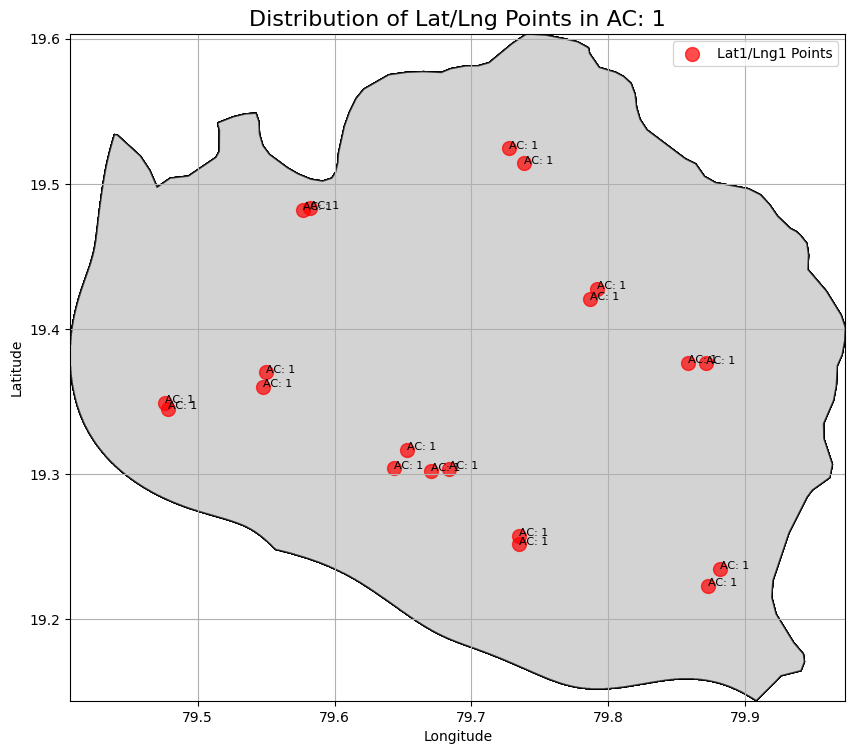

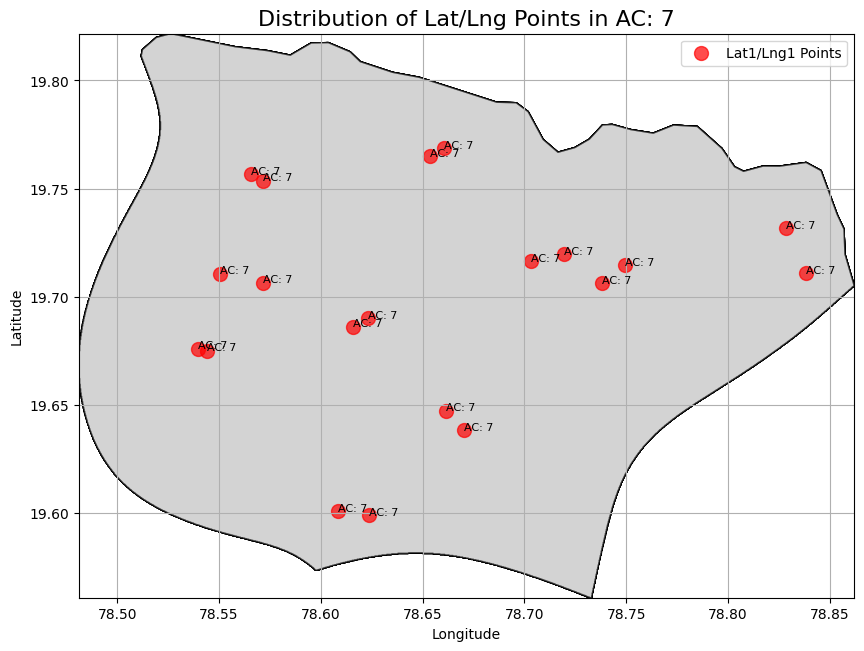

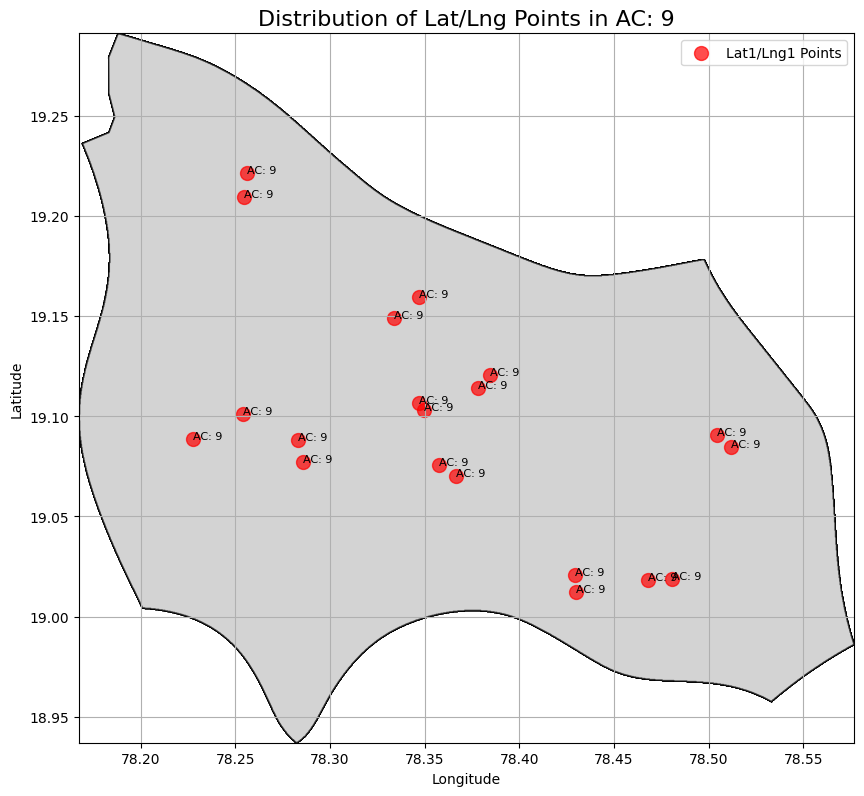

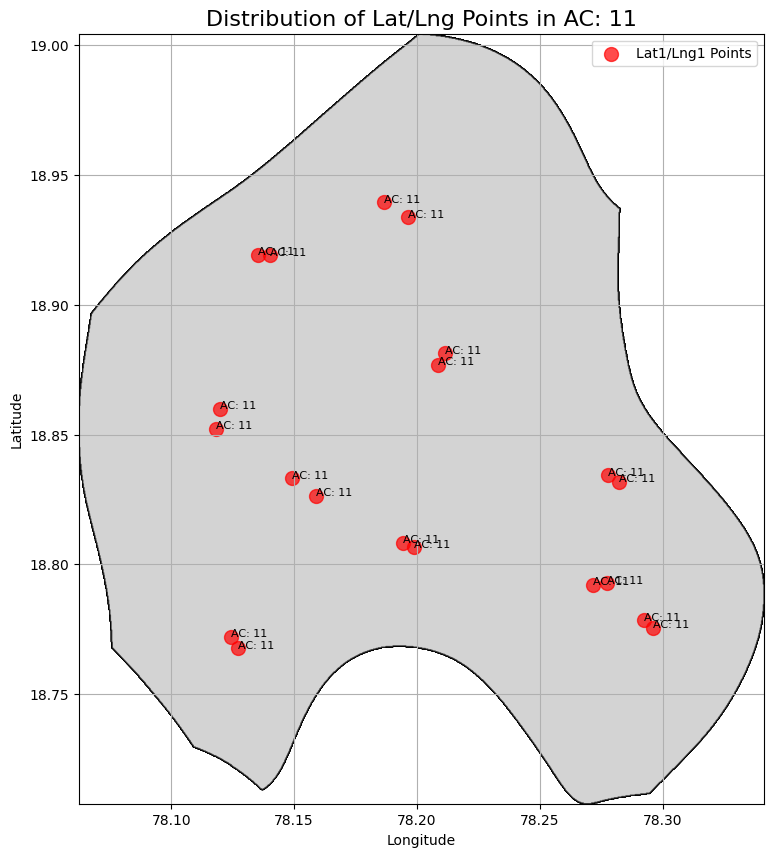

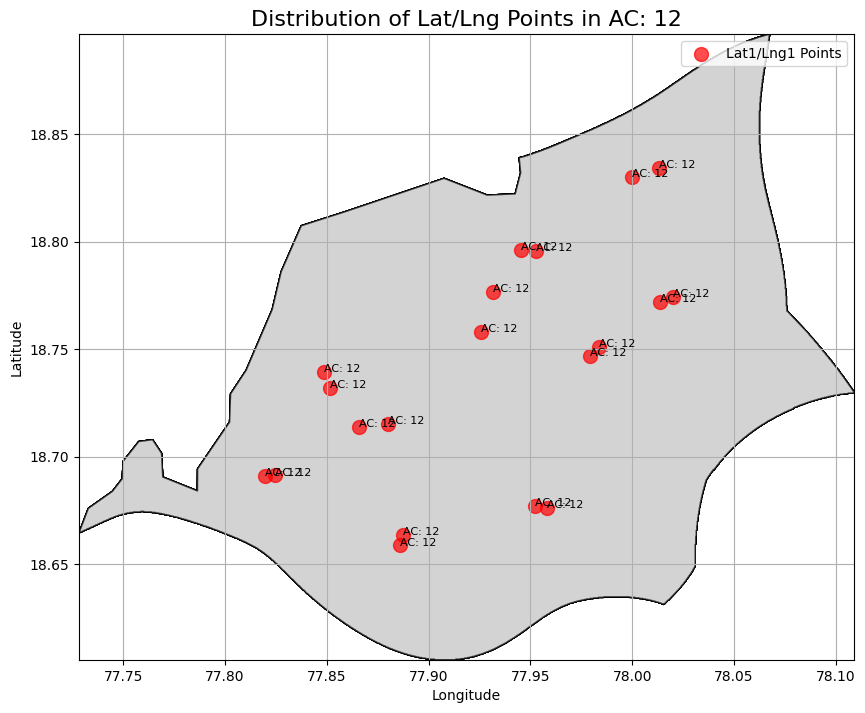

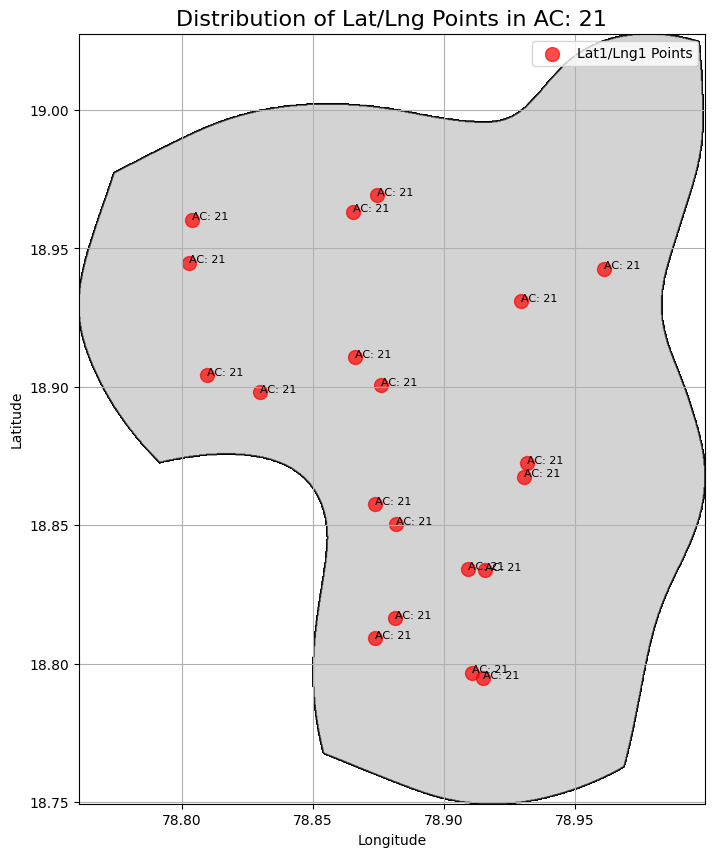

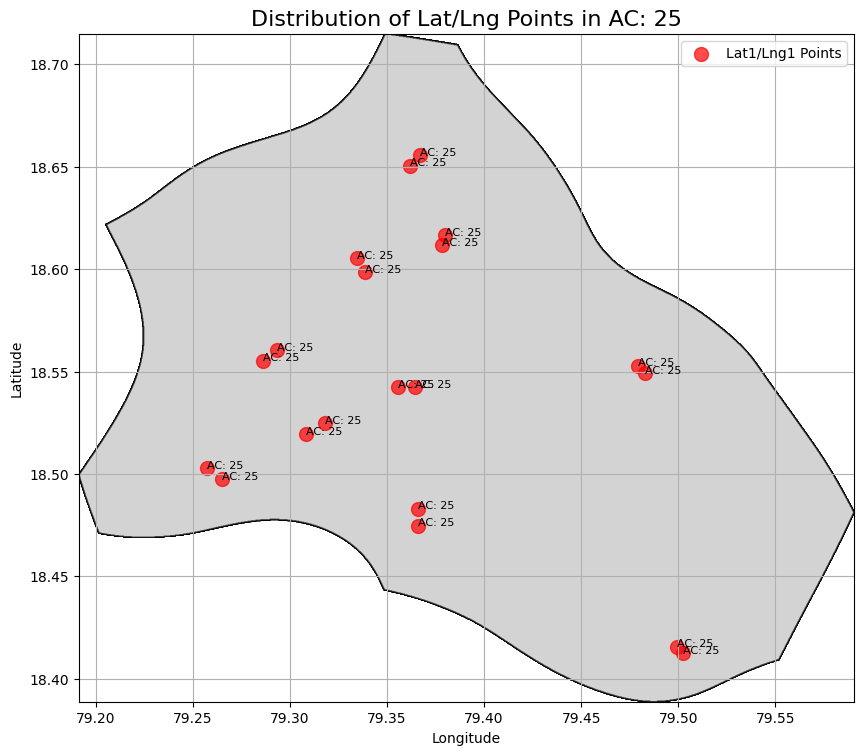

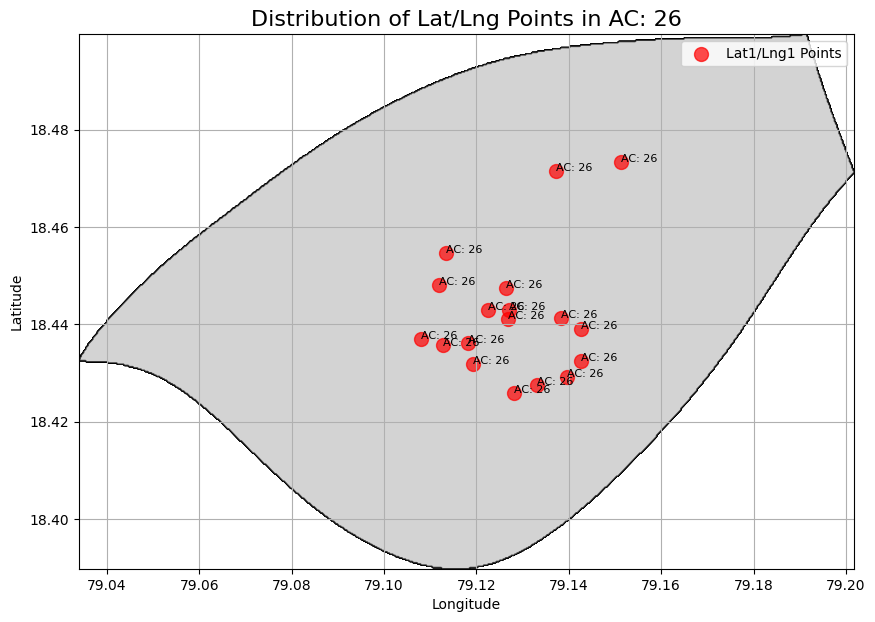

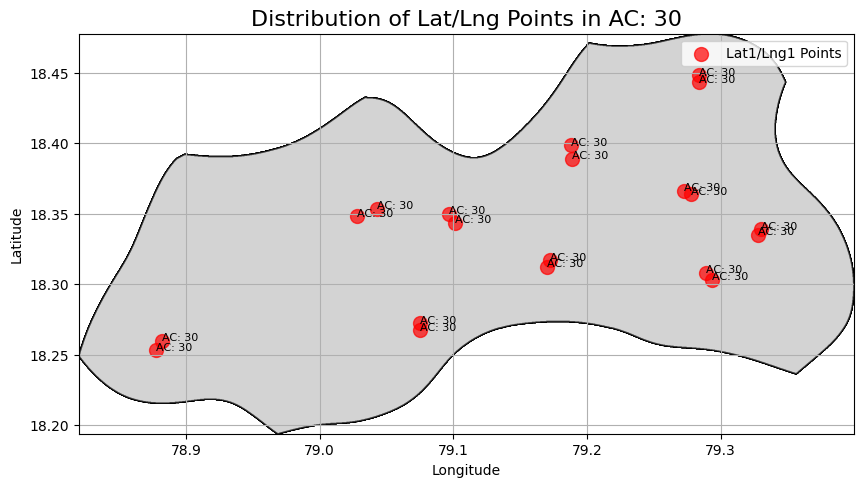

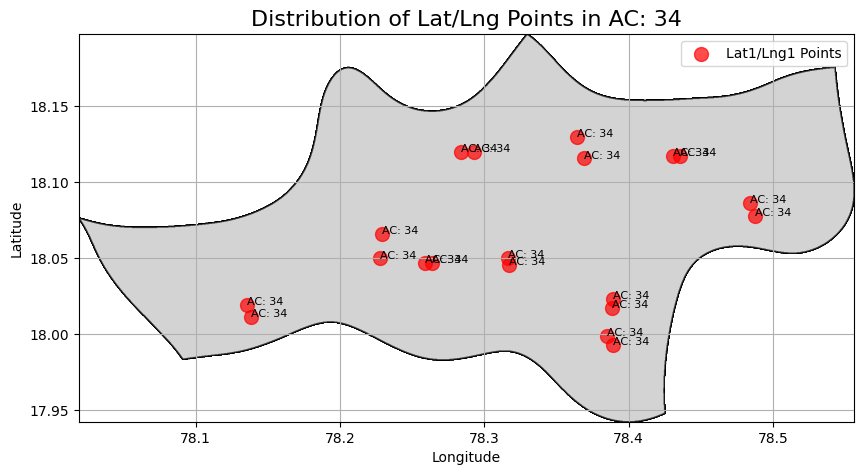

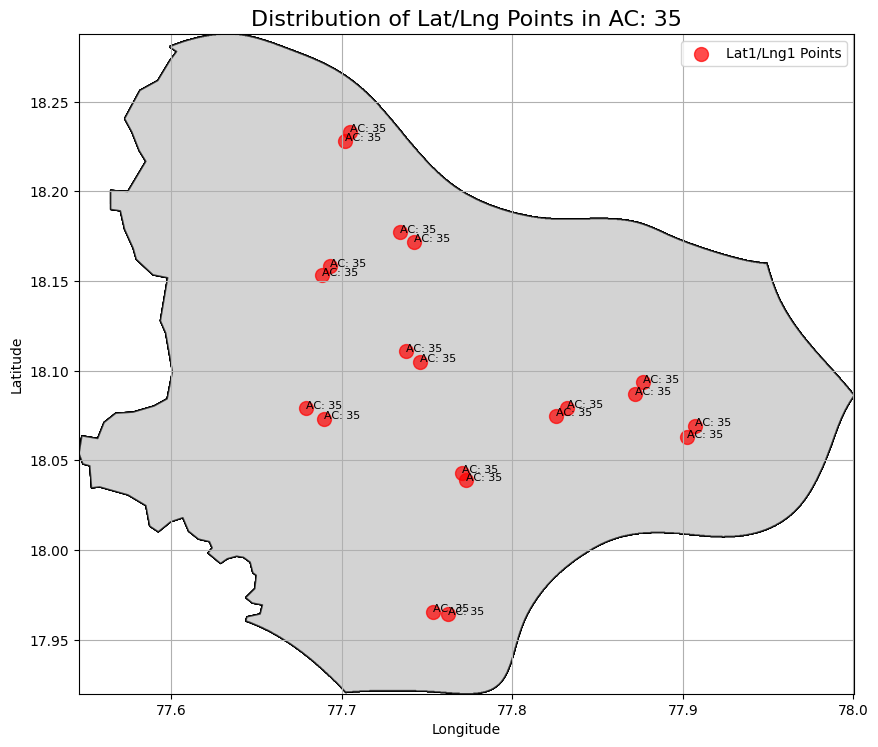

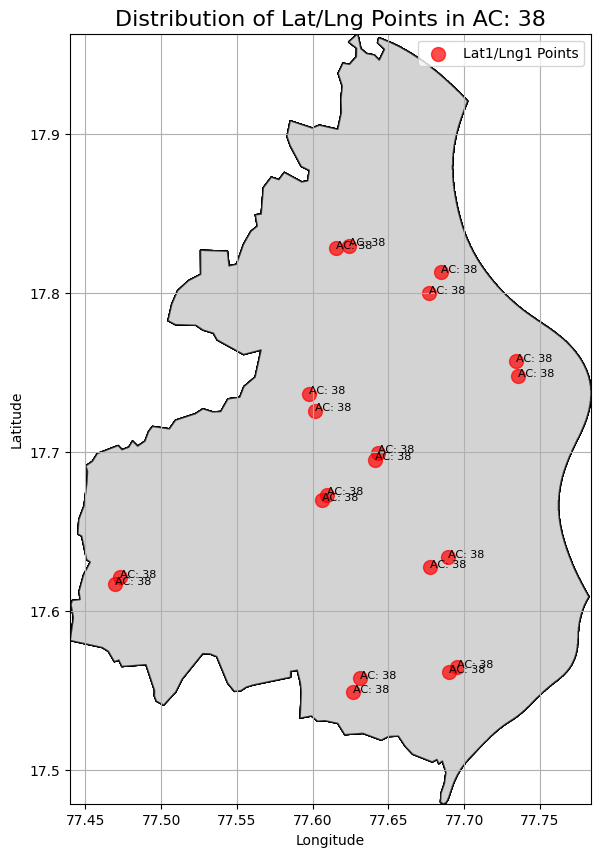

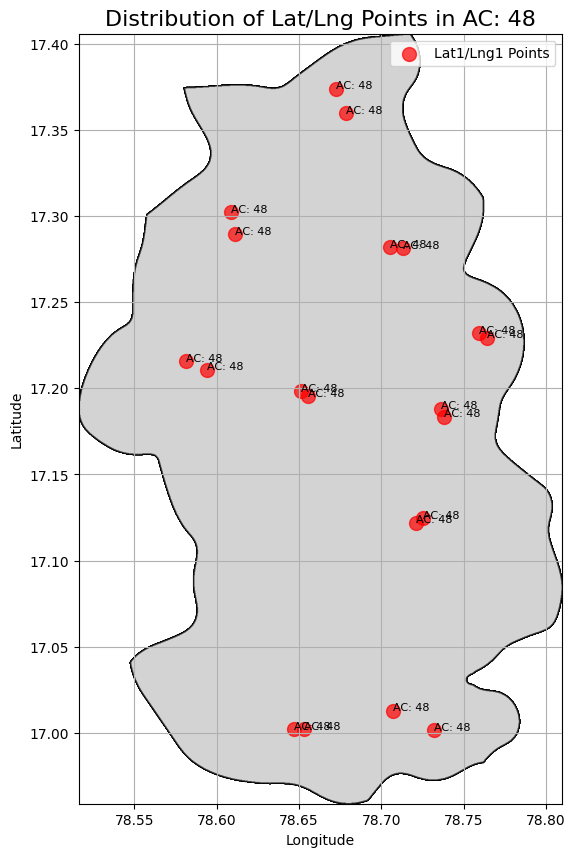

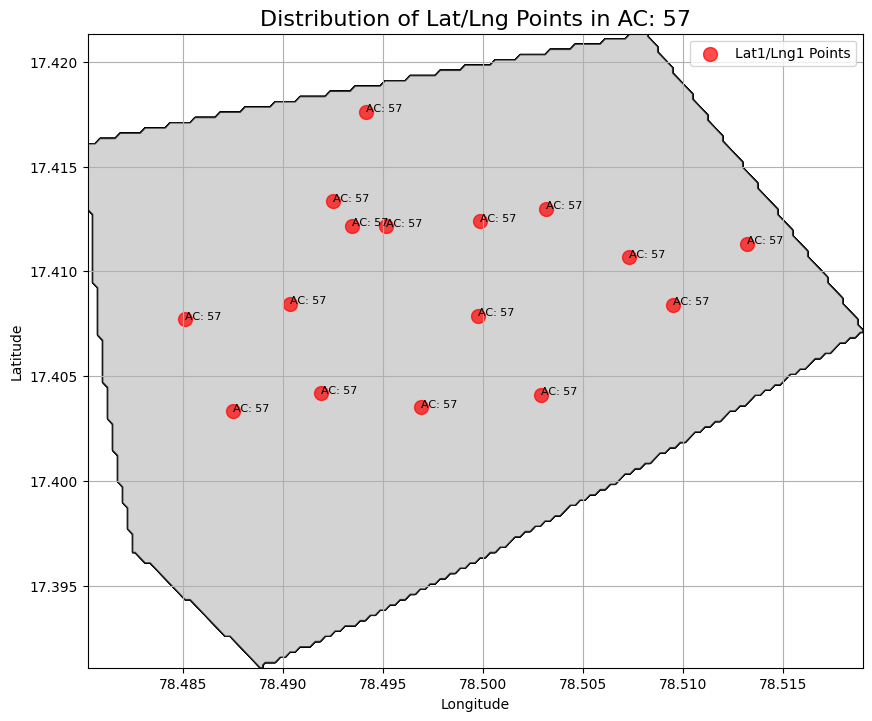

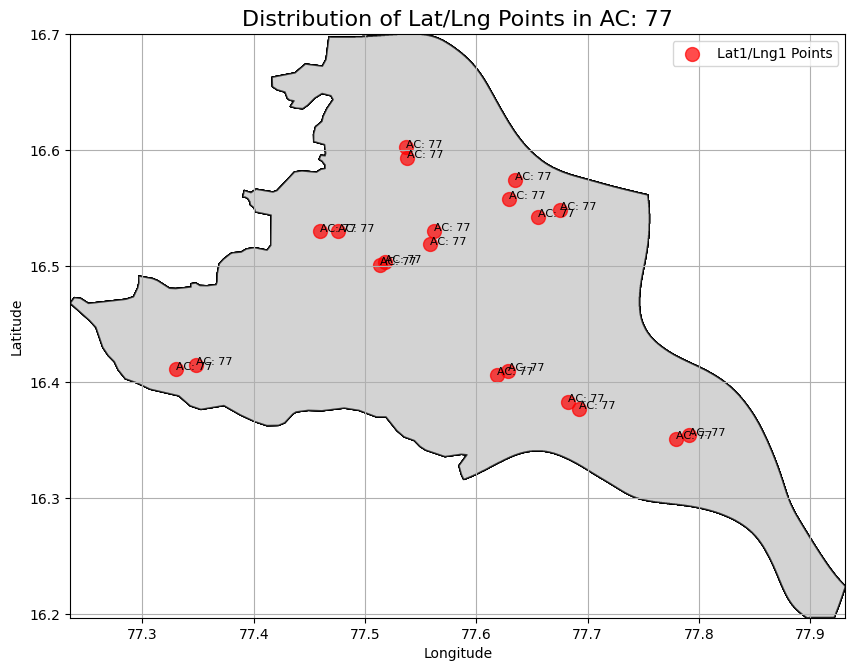

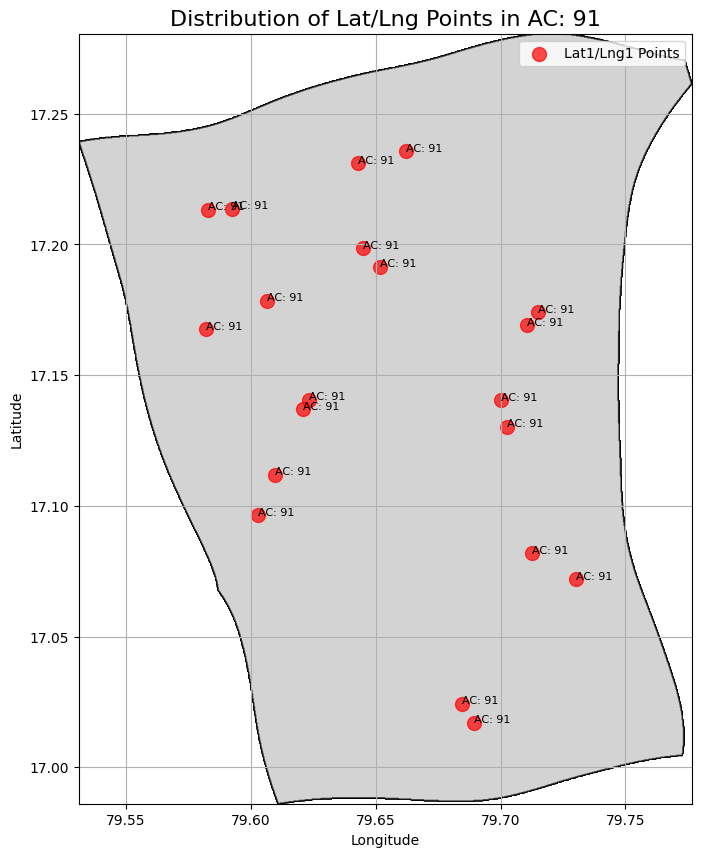

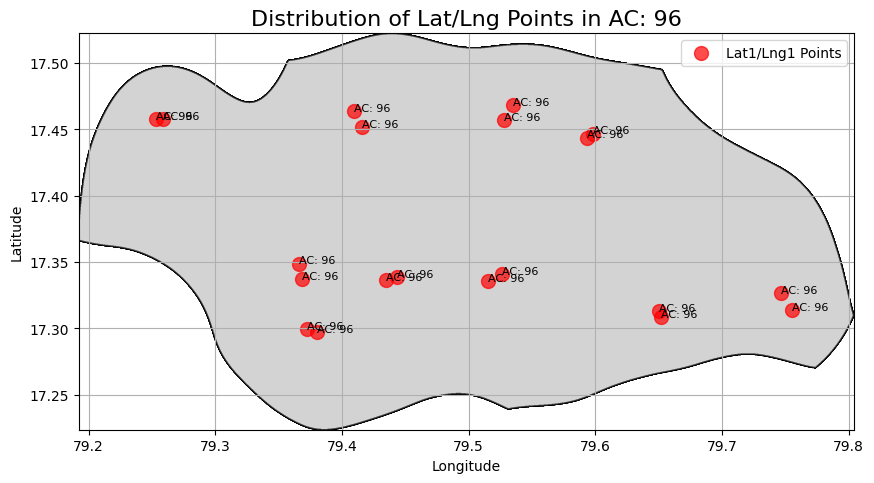

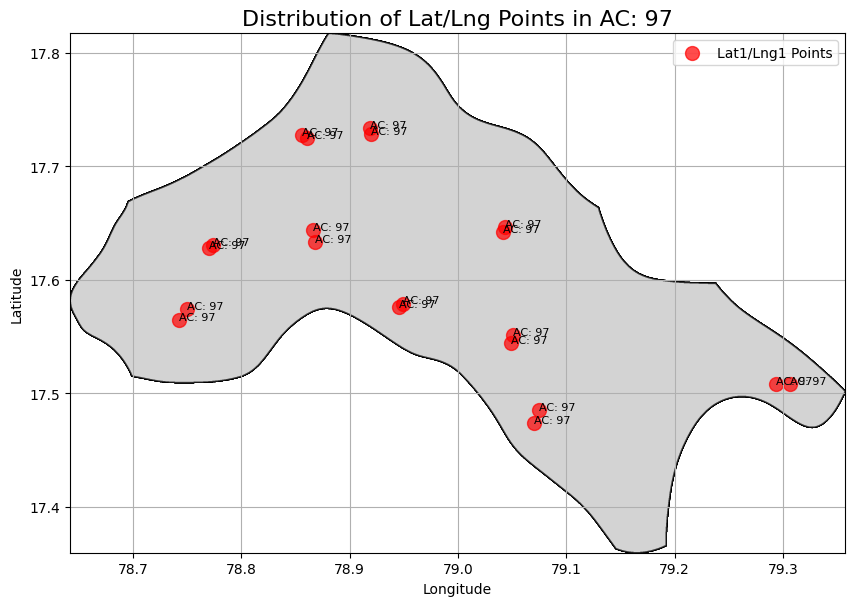

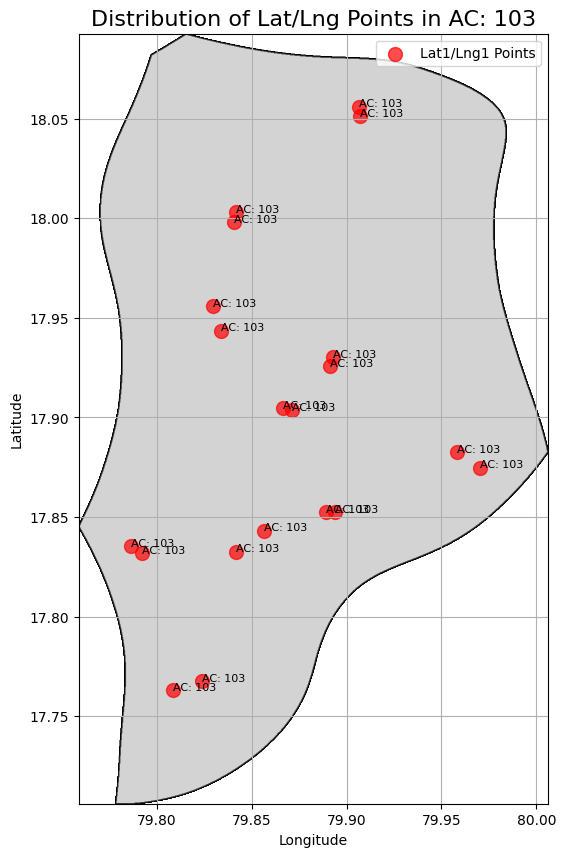

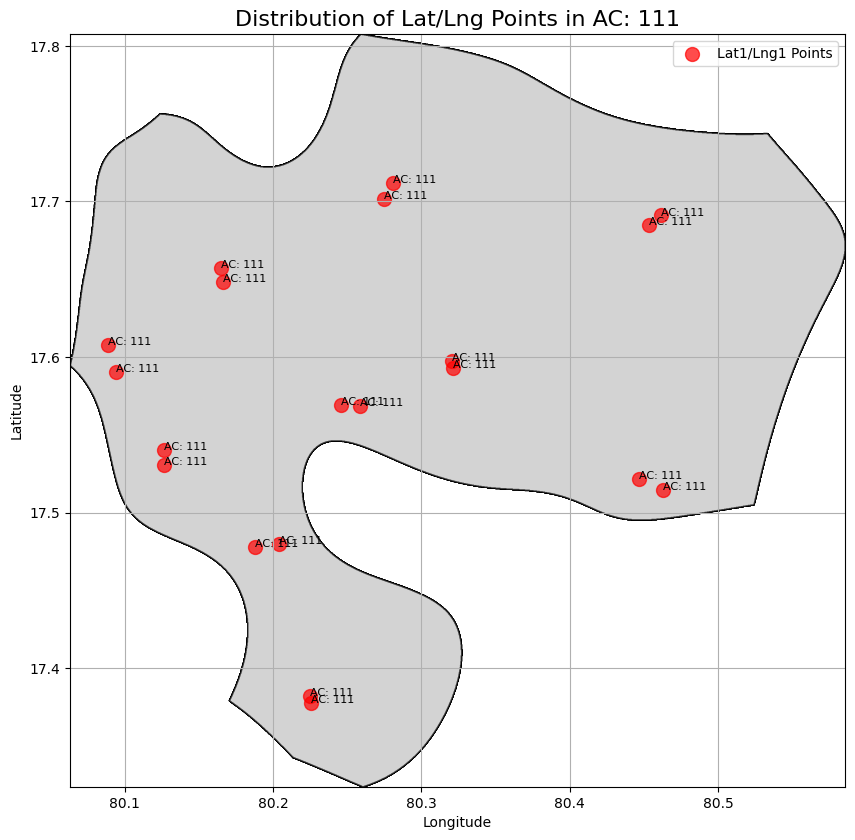

In [80]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming 'mergedf' is already a GeoDataFrame with the geometry defined.
# Convert 'mergedf' to a GeoDataFrame if not already done
if not isinstance(mergedf, gpd.GeoDataFrame):
    mergedf = gpd.GeoDataFrame(mergedf, geometry='geometry')

# Create a function to plot the AC and mark lat/lng points
def plot_ac_distribution(ac):
    # Filter for the given AC
    ac_data = mergedf[mergedf['ac'] == ac]
    
    # Set up the plot
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Plot the AC boundary
    ac_data.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.5)
    
    # Plot the points (Lat1, Lng1)
    plt.scatter(ac_data['Lng1'], ac_data['Lat1'], color='red', label='Lat1/Lng1 Points', s=100, marker='o', alpha=0.7)
    
    # Annotate the points
    for idx, row in ac_data.iterrows():
        plt.annotate(f"AC: {row['ac']}", (row['Lng1'], row['Lat1']), fontsize=8, color='black')

    # Set plot titles and labels
    plt.title(f"Distribution of Lat/Lng Points in AC: {ac}", fontsize=16)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    
    # Set limits based on the AC geometry if available
    plt.xlim(ac_data.total_bounds[[0, 2]])  # Set x limits to the boundary
    plt.ylim(ac_data.total_bounds[[1, 3]])  # Set y limits to the boundary
    
    plt.legend()
    plt.grid()
    plt.show()

# Iterate through each unique AC and plot
for ac in mergedf['ac'].unique():
    plot_ac_distribution(ac)


In [81]:
mergedf.columns

Index(['ac', 'cluster', 'Lat1', 'Lng1', 'Distance (meters)', 'state', 'pc',
       'pc_name', 'ac_name', 'geometry'],
      dtype='object')

In [83]:
df_final.to_excel(r'C:\Users\krish\Downloads\inclusivemind\Telengana_Geolocation\20_ac\allbooth_with_cluster_telengana_ac.xlsx',index=False)

In [86]:
print(df_final.shape)
df_final.columns

(2331, 22)


Index(['state_x', 'district', 'district_n', 'pc_x', 'pc_name_x', 'ac',
       'ac_name_x', 'booth', 'booth_name', 'geometry_x', 'lat', 'lng',
       'state_y', 'pc_y', 'pc_name_y', 'ac_name_y', 'geometry_y', 'status',
       'point_geom', 'distance_to_boundary', 'cluster', 'PK1'],
      dtype='object')

In [87]:
df_map['PK'] = df_map['Lat1'].astype(str) + "_" + df_map['Lng1'].astype(str)
df_final['PK1'] = df_final['lat'].astype(str) + "_" + df_final['lng'].astype(str)


In [88]:
final_booth = pd.merge(df_final,df_map,left_on='PK1',right_on='PK',how = 'inner')
print(final_booth.shape)
final_booth.to_excel(r'C:\Users\krish\Downloads\inclusivemind\Telengana_Geolocation\20_ac\final_20_pc_location.xlsx',index=0)


(394, 28)


In [32]:
import pandas as pd
df=pd.read_excel(r"C:\Users\krish\Downloads\inclusivemind\Telengana_Geolocation\20_ac\final_80_ac.xlsx")
df.shape

(1580, 17)

In [35]:
df = df[df['ac'].isin([119, 118])]
df['ac'].unique()
df.shape

(40, 17)

In [36]:
df_shape = df_shape.drop_duplicates(subset=['AC_NO'], keep='first')


In [37]:
df_shape=gpd.read_file(r"C:\Users\krish\Downloads\inclusivemind\Telengana_Geolocation\20_ac\TELANGANA_ASSEMBLY.geojson")
dfw=gpd.read_file(r"C:\Users\krish\Downloads\inclusivemind\Telengana_Geolocation\20_ac\TELANGANA_ASSEMBLY.geojson")
df_shape = df_shape.drop_duplicates(subset=['AC_NO'], keep='first')
dfw = dfw.drop_duplicates(subset=['AC_NO'], keep='first')

df_shape.head()
mergedf = pd.merge(df,df_shape,left_on='ac',right_on='AC_NO',how = 'left')
mergedf.shape

(40, 34)

In [38]:
df_shape['AC_NO'].value_counts()

AC_NO
8      1
61     1
112    1
66     1
113    1
      ..
33     1
32     1
35     1
31     1
119    1
Name: count, Length: 119, dtype: int64

In [39]:
mergedf['geometry_y'].unique()

<GeometryArray>
[<POLYGON ((81.086 17.798, 81.084 17.797, 81.084 17.796, 81.082 17.795, 81.08...>, <POLYGON ((80.958 17.601, 80.957 17.601, 80.957 17.601, 80.956 17.601, 80.95...>]
Length: 2, dtype: geometry

In [41]:
import json
from shapely.geometry import Point, shape
import folium
import pandas as pd

# Assuming mergedf is your GeoDataFrame
joint_df = mergedf.copy()  # Create a copy to add Location_Status if needed

# Loop through unique ACs
for ac in mergedf['ac'].unique():  # Changed to 'ac'
    try:
        # Filter the DataFrame for the current AC
        df = mergedf[mergedf['AC_NO'] == ac]  # Changed to 'ac'

        # Extract the boundary for the current AC from the geometry_y column
        boundary1 = dfw[dfw['AC_NO'] == ac]  # Ensure this references the correct column

        # Create a Folium map centered at the mean coordinates of the AC
        m = folium.Map(location=[df['Lat'].mean(), df['Lng'].mean()], zoom_start=14,
                       tiles='OpenStreetMap', zoom_control=False, attribution=None, min_zoom=6, max_zoom=20)

        # Convert boundary to GeoJSON format and add to the map
        boundary_json = json.loads(boundary1.to_json())
        folium.GeoJson(boundary_json).add_to(m)

        # Plot each point in the merged DataFrame
        for index, row in df.iterrows():
            # Create a marker for the point
            folium.Marker(
                location=[row['Lat'], row['Lng']],  # Changed to 'Lat' and 'Lng'
                popup=f"Lat: {row['Lat']}, Lon: {row['Lng']}",  # Changed to 'Lat' and 'Lng'
                tooltip='Point Location'
            ).add_to(m)

        # Save the map to an HTML file
        m.save(f'Telengana{ac}_sample_maps.html')  # Changed to 'ac'
        print(f"Map for AC {ac} saved.")

    except Exception as e:
        print(f"Error processing AC {ac}: {e}")

# Optionally, save the joint DataFrame with any modifications
# joint_df.to_excel(r'C:\Users\krish\Downloads\mh_qc)p_value\mh_p_value_59.xlsx', index=False)


Map for AC 119 saved.
Map for AC 118 saved.


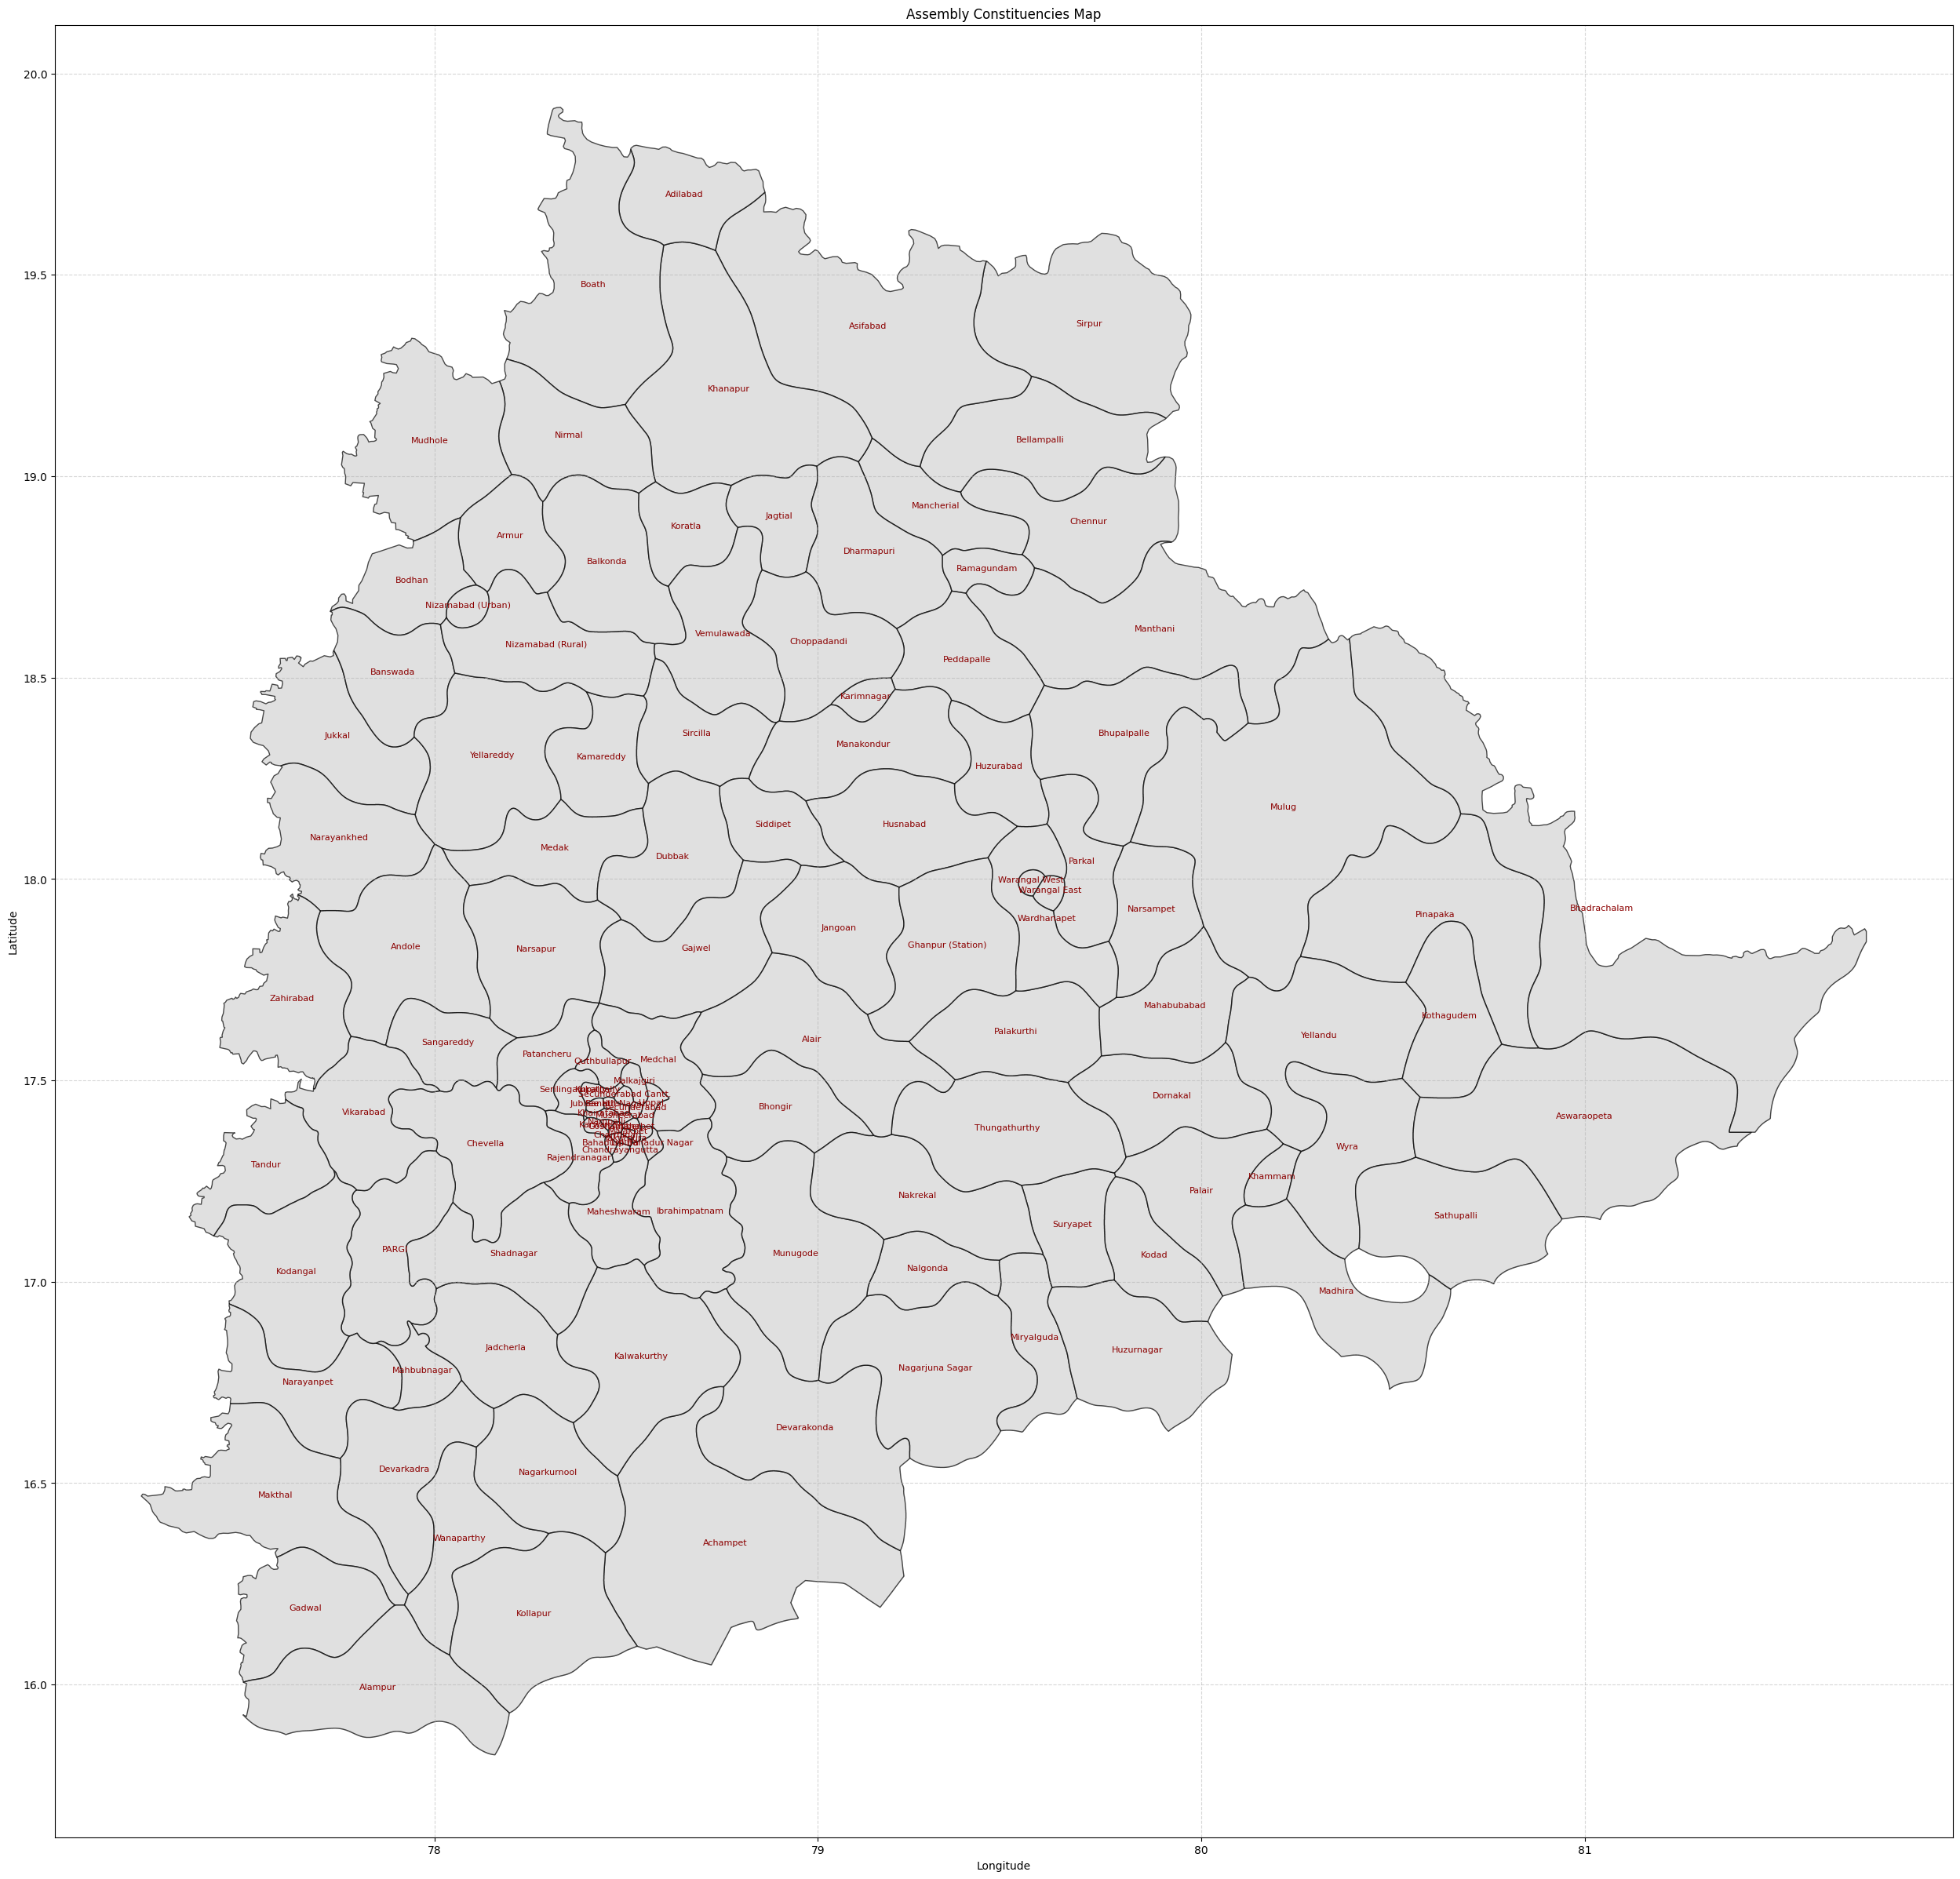

In [291]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile
df_shape = gpd.read_file(r"C:\Users\krish\Downloads\data_1_to_119\data_1_to_119.shp")

# Plot the shapefile
fig, ax = plt.subplots(figsize=(40, 30))
df_shape.plot(ax=ax, edgecolor='black', facecolor='lightgray', alpha=0.7)

# Add AC names to the map
for idx, row in df_shape.iterrows():
    plt.text(row.geometry.centroid.x, row.geometry.centroid.y, 
             row['ac_name'], fontsize=8, ha='center', color='darkred')

# Show the map
plt.title("Assembly Constituencies Map")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [159]:
df_65=pd.read_excel(r"C:\Users\krish\Downloads\inclusivemind\Telengana_Geolocation\15_moreto_COnvergent\final_31_location.xlsx")
df_65.columns

Index(['state', 'district', 'district_name', 'pc', 'pc_name', 'ac', 'ac_name',
       'booth', 'booth_name', 'geometry', 'status', 'point_geom',
       'distance_to_boundary', 'Cluster', 'Lat', 'Lng', 'Min_Distance', 'PK'],
      dtype='object')

In [160]:
l=df_65['ac'].unique().tolist()


In [161]:
df_80=pd.read_excel(r"C:\Users\krish\Downloads\inclusivemind\Telengana_Geolocation\final_35_ac_Telengana_location.xlsx")
df_80.columns

Index(['state', 'district', 'district_name', 'pc', 'pc_name', 'ac', 'ac_name',
       'booth', 'booth_name', 'geometry', 'status', 'distance_to_boundary',
       'Cluster', 'PK', 'Lat', 'Lng'],
      dtype='object')

In [162]:
df_15=df_80[~df_80['ac'].isin(l)]
sorted(df_15['ac'].unique())


[47, 57, 61, 105]

In [163]:
#df_15['district_name'].unique()

In [164]:
df_final=pd.concat([df_65,df_15])
df_final['ac'].nunique()

35

In [165]:
df_final.columns

Index(['state', 'district', 'district_name', 'pc', 'pc_name', 'ac', 'ac_name',
       'booth', 'booth_name', 'geometry', 'status', 'point_geom',
       'distance_to_boundary', 'Cluster', 'Lat', 'Lng', 'Min_Distance', 'PK'],
      dtype='object')

In [166]:
df_final.to_excel(r'C:\Users\krish\Downloads\inclusivemind\Telengana_Geolocation\final_35_ac.xlsx',index=0)

In [169]:
df_15=pd.read_excel(r"C:\Users\krish\Downloads\inclusivemind\Telengana_Geolocation\15_moreto_COnvergent\TS_15_acs.xlsx")
l=df_15["AC_NO"].unique().tolist()
l

[33, 47, 109, 61, 116, 92, 82, 93, 8, 16, 80, 101, 105, 110, 28]

In [170]:
dddf=df_final[df_final['ac'].isin(l)]
dddf['ac'].unique()

array([  8,  28, 110, 116,  82,  80,  93,  92,  33,  16, 109, 101,  47,
        61, 105], dtype=int64)

In [173]:
dddf['ac'].value_counts()

ac
8      20
28     20
110    20
116    20
82     20
80     20
93     20
92     20
33     20
16     20
109    20
101    20
47     20
61     20
105    20
Name: count, dtype: int64

In [175]:
dddf.to_excel(r'C:\Users\krish\Downloads\inclusivemind\Telengana_Geolocation\15_moreto_COnvergent\15_ac_geoloc_con.xlsx',index=0)